In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
from rdkit import Chem
from rdkit.Chem import Descriptors, MolSurf

In [2]:
df = pd.read_csv('data_combined.csv')

In [3]:
df

,solubility,SMILES
0,-2.1800,ClCC(Cl)(Cl)Cl
1,-2.0000,CC(Cl)(Cl)Cl
2,-1.7400,ClC(Cl)C(Cl)Cl
3,-1.4800,ClCC(Cl)Cl
4,-3.0400,FC(F)(Cl)C(F)(Cl)Cl
...,...,...
4490,-3.3319,NS(=O)(=O)c1ccc(C(=O)c2ccc(CNCc3ccccc3)cc2)s1
4491,-2.1669,CCCCNCc1ccc(C(=O)c2ccc(S(N)(=O)=O)s2)cc1
4492,-1.4812,NS(=O)(=O)c1ccc(C(=O)c2ccc(CN3CCOCC3)cc2)s1
4493,-1.8802,CN1CCN(Cc2ccc(C(=O)c3ccc(S(N)(=O)=O)s3)cc2)CC1


In [7]:
## Convert SMILES notation into rdkit mol object
mol_object_list = []
for item in df['SMILES']:
    mol = Chem.MolFromSmiles(item)
    mol_object_list.append(mol)

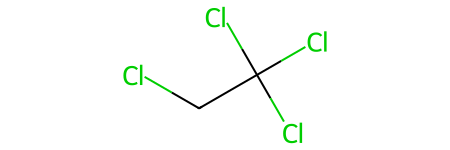

In [12]:
mol_object_list[0]

In [13]:
len(mol_object_list)

4495

Preliminary Features 
* MolLogP
* Molecular Weight (Avg)
* Number of Rotatable Bonds
* Number of Aromatic Atoms
* Number of Heavy Atoms
* Aromatic Proportion

In [36]:
## Define a function using rdkit to generate cLogP, Molecular Weight and Rotatable bonds

def generate(SMILES):

    mol_list = []
    for item in SMILES:
        mol = Chem.MolFromSmiles(item) 
        mol_list.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in mol_list:        
        
        ## Get molecular descriptors
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    ## Molecular descriptors into dataframe
    col_names=["MolLogP","MolWt","NumRotatableBonds"]   
    molecular_descriptors = pd.DataFrame(data = baseData, columns = col_names)
    
    return molecular_descriptors

In [37]:
df_f1 = generate(df.SMILES)
df_f1

,MolLogP,MolWt,NumRotatableBonds
0,2.5954,167.850,0.0
1,2.3765,133.405,0.0
2,2.5938,167.850,1.0
3,2.0289,133.405,1.0
4,2.9189,187.375,1.0
...,...,...,...
4490,2.9163,386.498,7.0
4491,2.5162,352.481,8.0
4492,1.4587,366.464,5.0
4493,1.3739,379.507,5.0


In [39]:
## Define function to calculate the number of aromatic atoms in a molecule
def get_aa(molecule):
    aa = [molecule.GetAtomWithIdx(i).GetIsAromatic() for i in range(molecule.GetNumAtoms())]
    aa_count = []
    for i in aa:
        if i==True:
            aa_count.append(1)
    sum_aa_count = sum(aa_count)
    return sum_aa_count

In [46]:
## Test
get_aa(mol_object_list[4494])

11

In [47]:
## Get number of aromatic atoms for all molecules in our dataset
num_aa = []
for mol in mol_object_list:
    aa_count = get_aa(mol)
    num_aa.append(aa_count)


In [49]:
len(num_aa)

4495

In [50]:
## Get number of Heavy atoms for all molecules in our dataset
num_ha = []
for mol in mol_object_list:
    ha_count = Descriptors.HeavyAtomCount(mol)
    num_ha.append(ha_count)

In [52]:
len(num_ha)

4495

In [53]:
## Combine features into a single dataframe
df_f2 = df_f1

In [56]:
df_f2['num_aromatic_atoms'] = num_aa
df_f2['num_heavy_atoms'] = num_ha

In [57]:
df_f2

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms
0,2.5954,167.850,0.0,0,6
1,2.3765,133.405,0.0,0,5
2,2.5938,167.850,1.0,0,6
3,2.0289,133.405,1.0,0,5
4,2.9189,187.375,1.0,0,8
...,...,...,...,...,...
4490,2.9163,386.498,7.0,17,26
4491,2.5162,352.481,8.0,11,23
4492,1.4587,366.464,5.0,11,24
4493,1.3739,379.507,5.0,11,25


In [58]:
## To Calculate Aromatic Proportion, we need to take the number of aromatic atoms in a molecule and divide it by the number of heavy atoms
df_f2['Aromatic_Proportion'] = df_f2['num_aromatic_atoms']/df_f2['num_heavy_atoms']

In [59]:
df_f2

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion
0,2.5954,167.850,0.0,0,6,0.000000
1,2.3765,133.405,0.0,0,5,0.000000
2,2.5938,167.850,1.0,0,6,0.000000
3,2.0289,133.405,1.0,0,5,0.000000
4,2.9189,187.375,1.0,0,8,0.000000
...,...,...,...,...,...,...
4490,2.9163,386.498,7.0,17,26,0.653846
4491,2.5162,352.481,8.0,11,23,0.478261
4492,1.4587,366.464,5.0,11,24,0.458333
4493,1.3739,379.507,5.0,11,25,0.440000


In [60]:
df_f2.to_csv('features.csv', index = False)

Additional Features
* Number of Valence electrons
* Number of Aromatic Rings
* Exact Molecular Weight
* Heavy Atom Weight
* Labute's Approximate Surface Area

In [8]:
df = pd.read_csv('data_combined.csv')
df_f3 = pd.read_csv('features.csv')

In [9]:
## Define function for number of valence electrons and radical electrons

## Define a function to get valence electrons
def get_valence_electrons(smiles_notation):
    mol = Chem.MolFromSmiles(smiles_notation)
    return Descriptors.NumValenceElectrons(mol)


In [10]:
df_f3['valence_electrons'] = df['SMILES'].apply(get_valence_electrons)

In [11]:
df_f3

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion,valence_electrons
0,2.5954,167.850,0.0,0,6,0.000000,38
1,2.3765,133.405,0.0,0,5,0.000000,32
2,2.5938,167.850,1.0,0,6,0.000000,38
3,2.0289,133.405,1.0,0,5,0.000000,32
4,2.9189,187.375,1.0,0,8,0.000000,50
...,...,...,...,...,...,...,...
4490,2.9163,386.498,7.0,17,26,0.653846,134
4491,2.5162,352.481,8.0,11,23,0.478261,124
4492,1.4587,366.464,5.0,11,24,0.458333,128
4493,1.3739,379.507,5.0,11,25,0.440000,134


In [12]:
## Get number of aromatic rings
def get_a_rings(smiles_notation):
    mol = Chem.MolFromSmiles(smiles_notation)
    return Descriptors.NumAromaticRings(mol)

In [13]:
df_f3['num_aromatic_rings'] = df['SMILES'].apply(get_a_rings)

In [14]:
df_f3.head()

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion,valence_electrons,num_aromatic_rings
0,2.5954,167.850,0.0,0,6,0.0,38,0
1,2.3765,133.405,0.0,0,5,0.0,32,0
2,2.5938,167.850,1.0,0,6,0.0,38,0
3,2.0289,133.405,1.0,0,5,0.0,32,0
4,2.9189,187.375,1.0,0,8,0.0,50,0


In [15]:
df_f3['num_aromatic_rings'].value_counts()

0    1580
1    1506
2    1157
3     193
4      43
5      13
6       2
7       1
Name: num_aromatic_rings, dtype: int64

In [16]:
## Get exact mol weight and heavy atom weight
def get_exactWt(smiles_notation):
    mol = Chem.MolFromSmiles(smiles_notation)
    return Descriptors.ExactMolWt(mol)

def get_heavyatomWT(smiles_notation):
    mol = Chem.MolFromSmiles(smiles_notation)
    return Descriptors.HeavyAtomMolWt(mol)

In [17]:
df_f3['exact_MolWt'] = df['SMILES'].apply(get_exactWt)
df_f3['heavyatomWt'] = df['SMILES'].apply(get_heavyatomWT)

In [21]:
## Get Labute's Approximate Surface Area
def labute_SA(smiles_notation):
    mol = Chem.MolFromSmiles(smiles_notation)
    return MolSurf.LabuteASA(mol)

In [22]:
df_f3['LASA'] = df['SMILES'].apply(labute_SA)

In [23]:
df_f3

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion,valence_electrons,num_aromatic_rings,exact_MolWt,heavyatomWt,LASA
0,2.5954,167.850,0.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
1,2.3765,133.405,0.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
2,2.5938,167.850,1.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
3,2.0289,133.405,1.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
4,2.9189,187.375,1.0,0,8,0.000000,50,0,185.901768,187.375,58.510598
...,...,...,...,...,...,...,...,...,...,...,...
4490,2.9163,386.498,7.0,17,26,0.653846,134,3,386.075884,368.354,156.092832
4491,2.5162,352.481,8.0,11,23,0.478261,124,2,352.091534,332.321,140.130564
4492,1.4587,366.464,5.0,11,24,0.458333,128,2,366.070799,348.320,144.448250
4493,1.3739,379.507,5.0,11,25,0.440000,134,2,379.102434,358.339,151.459480


In [ ]:
# df_f3.to_csv('features2.csv', index = False)

### Visualizations

In [2]:
df = pd.read_csv('data_combined.csv')
df_f = pd.read_csv('features2.csv')

In [8]:
df_merged = pd.concat([df, df_f], axis=1)

In [5]:
df.head()

,solubility,SMILES
0,-2.18,ClCC(Cl)(Cl)Cl
1,-2.00,CC(Cl)(Cl)Cl
2,-1.74,ClC(Cl)C(Cl)Cl
3,-1.48,ClCC(Cl)Cl
4,-3.04,FC(F)(Cl)C(F)(Cl)Cl


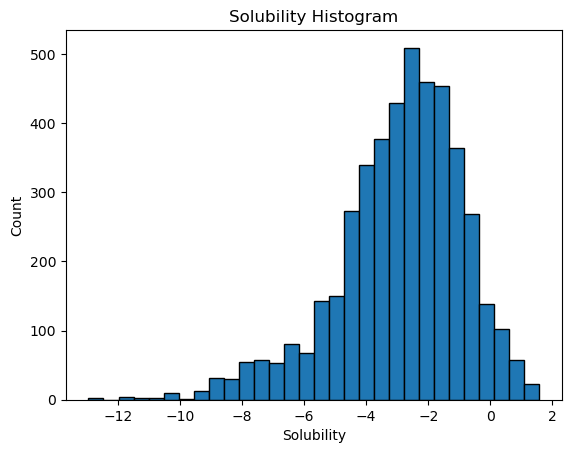

In [6]:
## Histogram of Solubility
plt.hist(df['solubility'], bins=30, edgecolor = 'black')
plt.xlabel('Solubility')
plt.ylabel('Count')
plt.title('Solubility Histogram')
plt.show()

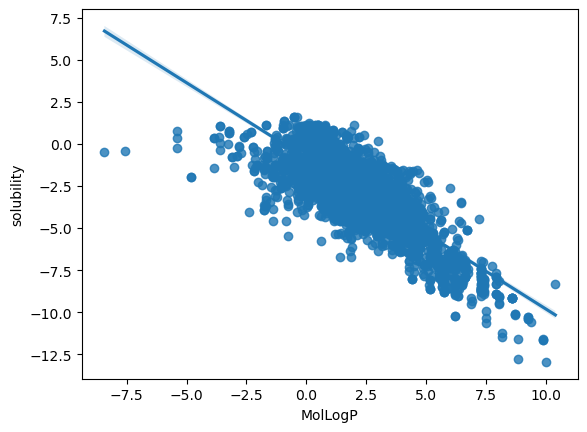

In [10]:
sns.regplot(x="MolLogP", y="solubility", data=df_merged)
plt.show()

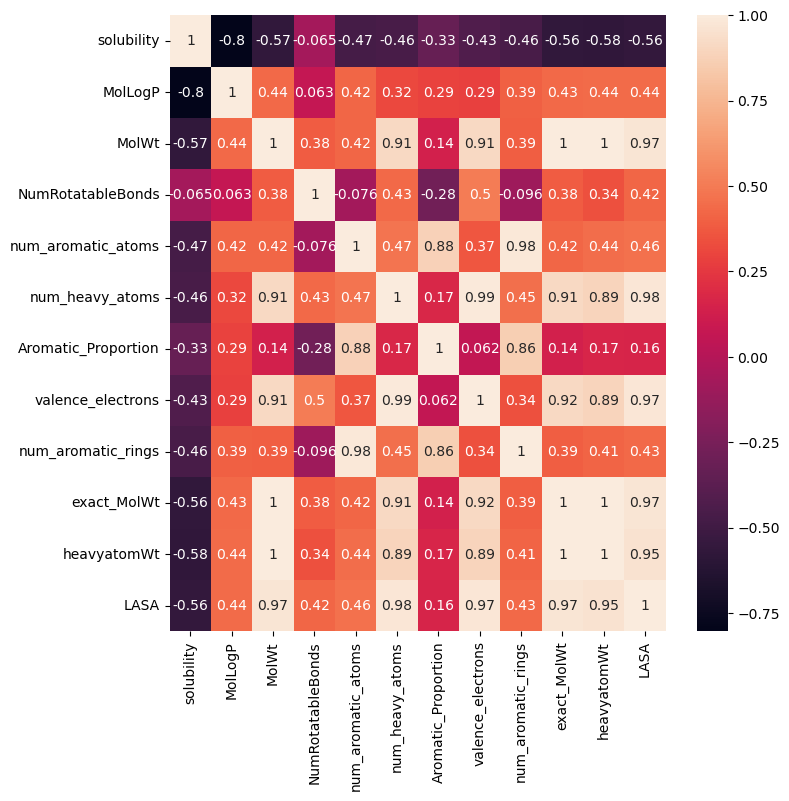

In [16]:
corr = df_merged.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot = True)
plt.show()

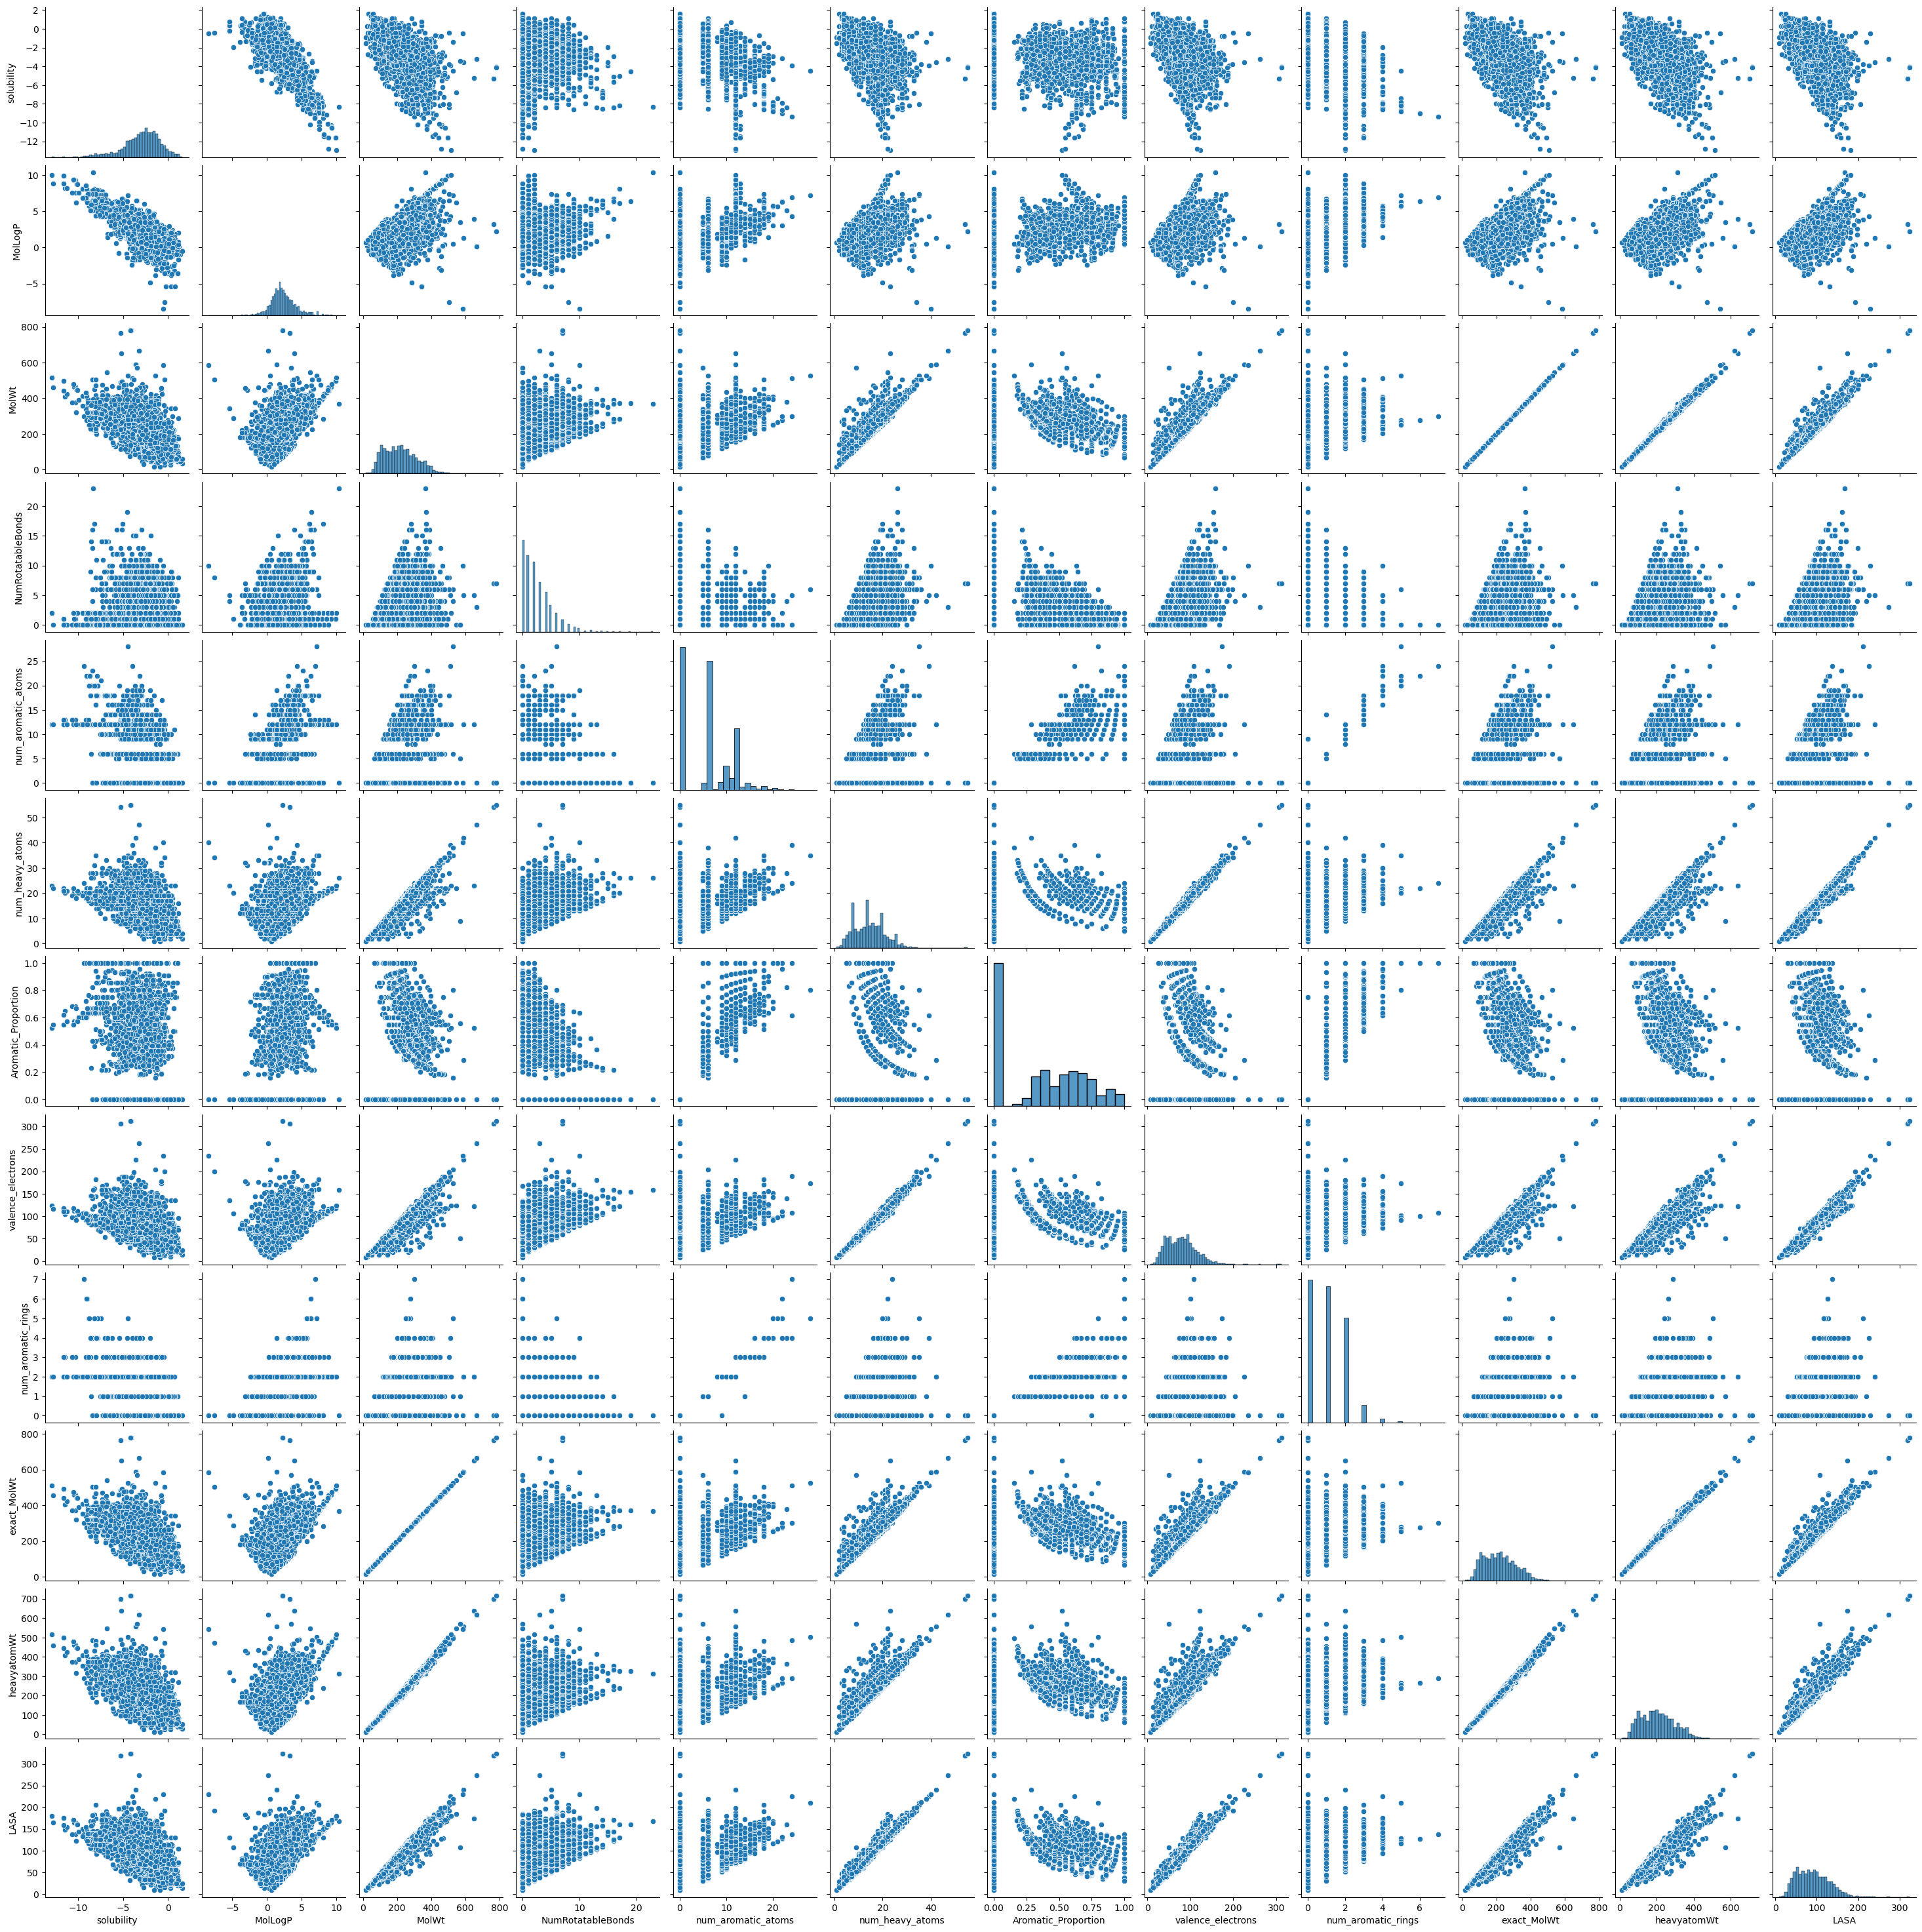

In [17]:
sns.pairplot(df_merged)
plt.show()